In [1]:
import pandas as pd
df=pd.read_csv("train_news_final.csv",encoding = 'latin1')

In [ ]:
#latin-1 enables me to load my dataset successfully otherwise there were encoding errors
#also before loading my dataset here i filtered the label column with 1 and 0 values as the label column was not organized and had text in between

In [2]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0,NaN,NaN,NaN,NaN,NaN
1,1,10041,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0,NaN,NaN,NaN,NaN,NaN
2,2,19113,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0,NaN,NaN,NaN,NaN,NaN
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0,NaN,NaN,NaN,NaN,NaN
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,NaN,NaN,NaN,NaN,NaN


In [3]:
df.headline[50]

'Trump Meets With Four Candidates for National Security Adviser - The New York Times'

In [ ]:
#keeping only the neccesary columns

In [4]:
col_list=['id','headline','written_by',
          'news','label']

In [5]:
df=df[col_list]

In [6]:
df.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [7]:
print ('fake and not fake counts','\n',df.label.value_counts())

fake and not fake counts 
 1    10371
0    10350
Name: label, dtype: int64


In [ ]:
#50 % for both the labels

In [8]:
df.shape

(20721, 5)

In [9]:
df.label[321]

0

In [10]:
df.isnull().sum()

id               0
headline       558
written_by    1952
news            39
label            0
dtype: int64

In [11]:
print ('not fake ratio = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')
print ('fake ratio  = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')

not fake ratio =  50.0 %
fake ratio  =  50.0 %


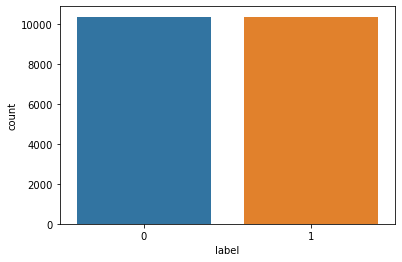

In [12]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [ ]:
#let's have a look at other features,like we can see we have 4165 unique authors who have written this news

In [13]:
l=df["written_by"].to_list()
print('There is '+ str(len(set(l)))+" different authors/writers of the news atricles")

There is 4165 different authors/writers of the news atricles


In [14]:
df['written_by'].value_counts().head(n=20)

Pam Key                243
admin                  193
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
Jeff Poor              107
AWR Hawkins            107
Joel B. Pollak         106
Trent Baker            102
Breitbart London        96
Bob Price               93
Ben Kew                 90
Charlie Nash            88
Pakalert                86
Eddy Lavine             85
Name: written_by, dtype: int64

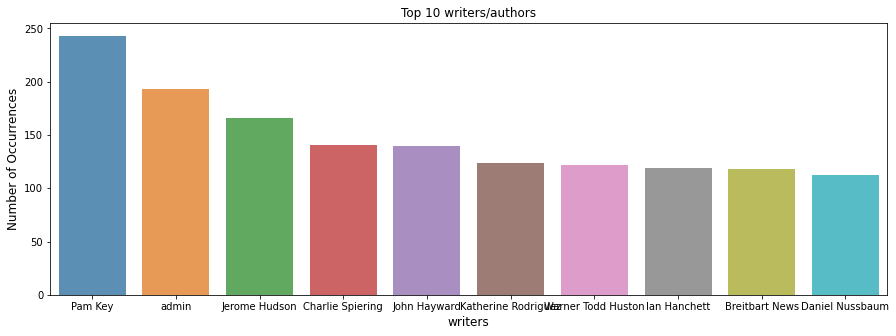

In [15]:
import matplotlib.pyplot as plt
written_by_count  = df['written_by'].value_counts()
written_by_count = written_by_count[:10,]
plt.figure(figsize=(15,5))
sns.barplot(written_by_count.index, written_by_count.values, alpha=0.8)
plt.title('Top 10 writers/authors')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('writers', fontsize=12)
plt.show()
#top 10 authors

In [16]:
df.id.nunique()
#id is unique for each news

20721

In [17]:
df['length'] = df.news.str.len()
df.head(5)

,id,headline,written_by,news,label,length
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0,8064.0
1,10041,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0,6253.0
2,19113,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0,441.0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0,6662.0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,9290.0


In [18]:
from nltk.tokenize import word_tokenize
import string

import nltk.corpus
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [19]:
nltk.download('punkt')
punct=string.punctuation

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\COMP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df.isnull().sum()

id               0
headline       558
written_by    1952
news            39
label            0
length          39
dtype: int64

In [22]:
df = df.dropna(subset=['news'])

# data cleaning

In [23]:
df["news"][45]
#before data cleaning

'hat tip: What Really Happened \nAlex Jonesâ\x80\x99 6-minute analysis on released e-mails: \nIn context, please be clear this is not an endorsement of Trump for President. When Americans are told an election is defined by touching a computer screen without a countable receipt that can be verified, they are being told a criminal lie to allow election fraud . This is self-evident, but Princeton , Stanford , and the President of the American Statistical Association are among the leaders pointing to the obvious (and here , here , here , here , here , here , here , here , here , here , here , here , here , here , here , here , here , here , here ). Again, no professional would/can argue an election is legitimate when there is nothing for anyone to count. Private e-mails on private server + $2 billion Clinton Foundation â\x80\x93 10% for â\x80\x9ccharityâ\x80\x9d = massive criminal fraud \nSince 2001 , the Clinton Foundation has raised ~$2 billion for â\x80\x9ccharity,â\x80\x9d but with tax

In [27]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
df["news"][9]

'leave reply toni emerson â\x80\x93 fall love, heart becomes full feel-good qualities infuse life joy excitement. everything feels light, fresh vibrant. wake brighter day, air warmer, sun brighter, everything right world. living life interactive colorful kaleidoscope love highest human experiences wouldnâ\x80\x99t fantastic capture experience transform permanent state being? next articles, formulate unique blueprint reconnect love source transition experiences love come go living love fullest moment moment. love emotions understanding difference love many feelings inspired love essential realizing love baseline everything else emerges. human beings, experience many emotional states loveâ\x80\x99s vast umbrella, yet fails convey totality love is. love equal sum parts. far powerful transient emotions. integral state waiting rediscovered. deeply nourishing emotion ushered love stands merits offers specific gifts. emotions assist reaching full potential human deepening interior faculties a

In [31]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','dont','doin','ure','i','and','on','us','would','one'])
punct =string.punctuation 
df['news'] = df['news'].str.lower()
df['news']=df['news'].str.replace("‘", "")
df['news']=df['news'].str.replace("’", "")



df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['news'] = df['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['news'] = df['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['news'] = df['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df['news'] = df['news'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df['news'] = df['news'].str.replace(r'\d+(\.\d+)?', ' ')
df['news']=df['news'].apply(lambda x: str(x))
df['news'] = df['news'].str.replace("-",'')
df["news"]=df.news.str.replace('[^\w\.]',' ')
df["news"]=df.news.str.replace("â",'')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['news'] = df['news'].apply(lambda x: convert(x)) 




In [32]:

df['news'][9]
#after data cleaning,there are unnesscary spaces will remove it further

'leave reply toni emerson    fall love  heart becomes full feelgood qualities infuse life joy excitement. everything feels light  fresh vibrant. wake brighter day  air warmer  sun brighter  everything right world. living life interactive colorful kaleidoscope love highest human experiences wouldn  t fantastic capture experience transform permanent state being  next articles  formulate unique blueprint reconnect love source transition experiences love come go living love fullest moment moment. love emotions understanding difference love many feelings inspired love essential realizing love baseline everything else emerges. human beings  experience many emotional states love  s vast umbrella  yet fails convey totality love is. love equal sum parts. far powerful transient emotions. integral state waiting rediscovered. deeply nourishing emotion ushered love stands merits offers specific gifts. emotions assist reaching full potential human deepening interior faculties also giving human quali

In [33]:
df["news"]=df.news.str.replace(".",'')
df["news"]=df.news.str.replace('\s+',' ')




In [34]:
df["news"][45]
#now a more cleaner data

'hat tip really happened alex jones minute analysis released emails context please clear endorsement trump president americans told election defined touching computer screen without countable receipt verified told criminal lie allow election fraud selfevident princeton stanford president american statistical association among leaders pointing obvious and again professional would can argue election legitimate nothing anyone count private emails private server billion clinton foundation charity massive criminal fraud since clinton foundation raised billion charity tax records revealing money went programs apparently going directly bill hillary clinton and second summary judge jeanine pirro full minute interview disclaimer corporate media outlet never tell truth us israel connections create isis liestarted wars aggression also requiring arrests economic hitman john perkins minutes context type neocolonialism capitalism clinton committed obvious federal felonies operating private governmen

# word cloud for headlines

In [130]:
df = df.dropna(subset=['headline'])
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','dont','doin','ure','i','and','on','us','would','one'])
punct =string.punctuation 
df['headline'] = df['headline'].str.lower()
df['headline']=df['headline'].str.replace("‘", "")
df['headline']=df['headline'].str.replace("’", "")



df['headline'] = df['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df['headline'] = df['headline'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['headline'] = df['headline'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df['headline'] = df['headline'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df['headline'] = df['headline'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df['headline'] = df['headline'].str.replace(r'\d+(\.\d+)?', ' ')
df['headline']=df['headline'].apply(lambda x: str(x))
df['headline'] = df['headline'].str.replace("-",'')
df["headline"]=df.news.str.replace('[^\w\.]',' ')
df["headline"]=df.news.str.replace("â",'')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df['headline'] = df['headline'].apply(lambda x: convert(x)) 



In [ ]:
#label 1 fake news

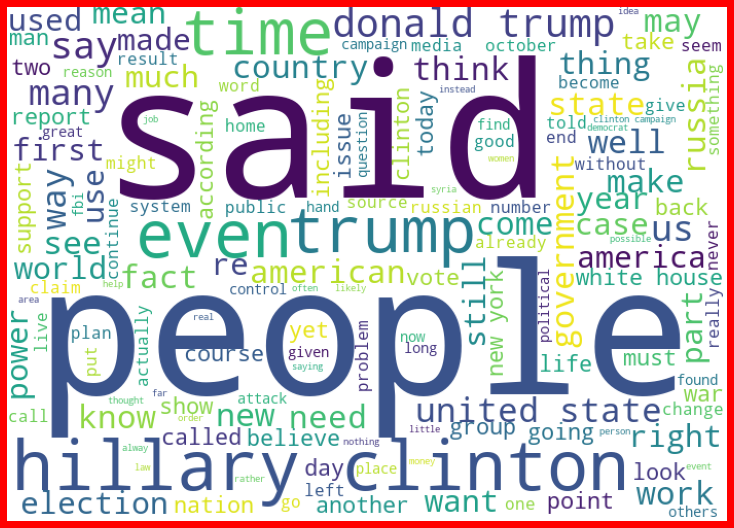

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spams = df['headline'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#label 0 not fake news
#only a few things, like presence of mr and mrs in the not fake news, occurrences of word may ,often in fake news.
#data is all about elections, mostly revolving around trump, Hillary Clinton, campaigns 


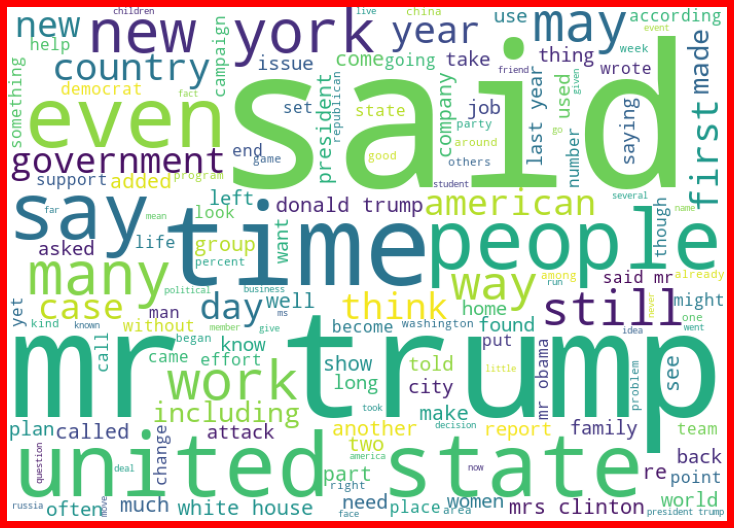

In [39]:
from wordcloud import WordCloud


spams = df['headline'][df['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=150).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
                                    










# fdist for label 0 and label 1 seperately by seggrating the data for each label into two different dataframes

In [40]:
df2=pd.read_csv("news_label_0.csv",encoding = 'latin1')
col_list=['id','headline','written_by',
          'news','label']
df2=df2[col_list]
df2.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â In Sonny Perdueâs telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâs Lione...,David Waldstein,HOUSTON â Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: âDo Not Walk the Plank and ...,Pam Key,"Sunday on ABCâs âThis Week,â while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â The beleaguered Republican...",0
4,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you canât eat t...,0


In [41]:
df2.label.value_counts()

0    10350
Name: label, dtype: int64

In [42]:
df2 = df2.dropna(subset=['news'])

In [43]:
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would','apple-iss','one','also','c','e'])
 
df2['news'] = df2['news'].str.lower()


df2['news'] = df2['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df2['news'] = df2['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df2['news'] = df2['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df2['news'] = df2['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df2['news'] = df2['news'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df2['news'] = df2['news'].str.replace(r'\d+(\.\d+)?', ' ')
df2['news']=df2['news'].apply(lambda x: str(x))
df2['news'] = df2['news'].str.replace("'",' ')
df2['news'] = df2['news'].str.replace("-",' ')
df2["news"]=df2.news.str.replace('[^\w\.]',' ')
df2['news'] = df2['news'].str.replace("_____",' ')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df2['news'] = df2['news'].apply(lambda x: convert(x)) 




In [44]:
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("â",'',sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df2.news.values.tolist()
data_words = list(sent_to_words(data))
print(data[:1])

['washington â   sonny perdueâ  s telling  georgians growing weary corruption scandals state took governor â   time gave version â  drain swampâ   pledge. â  my first goal governor restore public trust state government changing culture state government â   mr. perdue told leadership conference kennesaw state university april  . â  our form government depends mutual bond trust people government. people become cynical government. â   mr. perdue  republican awaiting confirmation serve president trumpâ  s agriculture secretary  became target frequent criticism failing honor ethics pledge eight years governor. criticism centers fact that  mr. trump has  continued help run family business ventures â   four companies â   serving governor. mr. perdue last cabinet members awaiting senate confirmation. date set confirmation hearing holdup release paperwork accompanying nomination federal office government ethics blamed delay. office must examine mr. perdueâ  s proposal avoid conflicts interest r

In [45]:
import gensim
dictionary_label_0 = gensim.corpora.Dictionary(data_words)
print(dictionary_label_0)


Dictionary(92909 unique tokens: ['acceptable', 'accompanying', 'according', 'acting', 'action']...)


In [50]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data)) 
texts=listToString(data)
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(texts)
from nltk.probability import FreqDist


stoplist=['.','t','â','re','i','iâ','s','it']

filtered_tokenized_text = [word for word in tokenized_word if word not in stoplist]

fdist = FreqDist(filtered_tokenized_text)



# fdist label 0(not fake news)

In [51]:
fdist.most_common(40)

[('said', 66944),
 ('mr.', 63889),
 ('trump', 26779),
 ('new', 19252),
 ('people', 18679),
 ('president', 15406),
 ('like', 15331),
 ('ms.', 12338),
 ('could', 11422),
 ('the', 11347),
 ('time', 11332),
 ('itâ', 11277),
 ('two', 11007),
 ('years', 10917),
 ('many', 10883),
 ('last', 10663),
 ('first', 10568),
 ('states', 10525),
 ('state', 10403),
 ('united', 9871),
 ('even', 9688),
 ('year', 9237),
 ('news', 9032),
 ('american', 8747),
 ('trumpâ', 8213),
 ('house', 8064),
 ('government', 7857),
 ('made', 7432),
 ('may', 7283),
 ('get', 7015),
 ('white', 6878),
 ('going', 6796),
 ('back', 6774),
 ('make', 6742),
 ('say', 6687),
 ('percent', 6672),
 ('campaign', 6665),
 ('much', 6506),
 ('way', 6492),
 ('officials', 6471)]

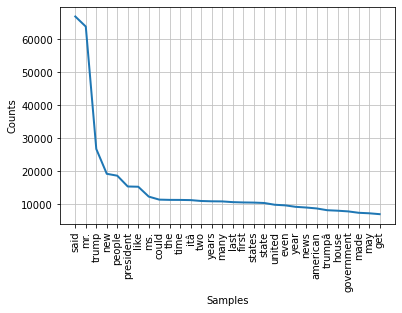

In [52]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [53]:
df3=pd.read_csv("news_label_1.csv",encoding = 'latin1')
col_list=['id','headline','written_by',
          'news','label']
df3=df3[col_list]
df3.head()

,id,headline,written_by,news,label
0,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
1,3196,Whatever the Outcome on November 8th the US Wi...,NaN,Taming the corporate media beast Whatever the ...,1
2,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
3,13559,NaN,steventexas,People have made up their minds on president.\...,1
4,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson â When we fall ...,1


In [55]:
df3 = df3.dropna(subset=['news'])
stop_words = set(stopwords.words('english') + ['ü','ur','4','2','im','dont','doin','ure','i','and','on','us','would','apple-iss','one','also','c','e'])
 
df3['news'] = df3['news'].str.lower()


df3['news'] = df3['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
df3['news'] = df3['news'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df3['news'] = df3['news'].str.replace(r'^www\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '  ')
df3['news'] = df3['news'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in punct))
df3['news'] = df3['news'].str.replace(r'"^\d+\s|\s\d+\s|\s\d+$"',
                                  ' ')

df3['news'] = df3['news'].str.replace(r'\d+(\.\d+)?', ' ')
df3['news']=df3['news'].apply(lambda x: str(x))
df3['news'] = df3['news'].str.replace("'",' ')
df3['news'] = df3['news'].str.replace("-",' ')
df3["news"]=df3.news.str.replace('[^\w\.]',' ')
df3['news'] = df3['news'].str.replace("_____",' ')
df3['news'] = df3['news'].str.replace("â",'')









from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer() 
def convert(text):     
    lemmatized_text = []     
    for i in text.split():         
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(i,pos="v")))     
        return ' '.join(lemmatized_text)  
    df3['news'] = df3['news'].apply(lambda x: convert(x)) 

In [56]:
import re

import gensim

# Converts into tokens (Alternative to word_tokenize)
from gensim.utils import simple_preprocess
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("â",'',sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data2 = df3.news.values.tolist()
data_words2 = list(sent_to_words(data2))
print(data2[:1])

['finian cunningham written extensively international affairs  articles published several languages. many recent articles appear renowned canadian based news website globalresearch master  s graduate agricultural chemistry worked scientific editor royal society chemistry  cambridge  england  pursuing career journalism. specializes middle east east africa issues given several american radio interviews well tv interviews press tv russia today. interests include capitalism  imperialism war  socialism  justice peace  agriculture trade policy  ecological impact  science technology  human rights. musician songwriter. previously  based bahrain witnessed political upheavals persian gulf kingdom well subsequent saudi led brutal crackdown pro democracy protests. author media commentator expelled bahrain june critical journalism highlighted many human rights violations western backed regime. many years  worked editor writer mainstream media  including  the mirror  irish times independent. origina

In [57]:
dictionary_label_1 = gensim.corpora.Dictionary(data_words2)

In [58]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(data2)) 
texts2=listToString(data2)
from nltk.tokenize import word_tokenize


tokenized_word2=word_tokenize(texts2)
fdist2 = FreqDist(tokenized_word2)


In [64]:
stoplist=['.','ð','ñ','t','it','ù','ø','ð¾ñ','ð¾ð','i','s']
filtered_tokenized_text2 = [word for word in tokenized_word2 if word not in stoplist]

fdist2 = FreqDist(filtered_tokenized_text2)


In [66]:
fdist2.most_common(30)

[('trump', 19594),
 ('clinton', 18814),
 ('people', 14952),
 ('hillary', 12337),
 ('said', 11402),
 ('new', 9888),
 ('like', 9329),
 ('time', 8533),
 ('world', 8498),
 ('state', 8224),
 ('president', 8168),
 ('even', 8161),
 ('election', 8118),
 ('government', 7495),
 ('many', 7317),
 ('obama', 7218),
 ('war', 7100),
 ('ðµñ', 7094),
 ('could', 6935),
 ('ð½ð', 6810),
 ('american', 6591),
 ('de', 6468),
 ('russia', 6454),
 ('media', 6309),
 ('states', 6188),
 ('u.s.', 5933),
 ('first', 5931),
 ('years', 5899),
 ('two', 5748),
 ('campaign', 5712)]

# fdist fake news(label 1)

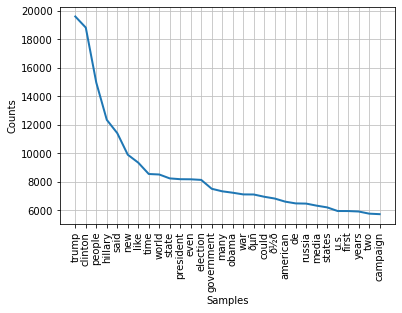

In [67]:
import matplotlib.pyplot as plt
fdist2.plot(30,cumulative=False)
plt.show()

In [68]:
df['clean_length'] = df.news.str.len()

df.head(5)

,id,headline,written_by,news,label,length,clean_length
0,9653,washington sonny perdue s telling georgians gr...,Eric Lipton and Steve Eder,washington sonny perdue s telling georgians gr...,0,8064.0,5470
1,10041,houston venezuela plan tactical approach desig...,David Waldstein,houston venezuela plan tactical approach desig...,0,6253.0,4197
2,19113,sunday abc s this week discussing republican p...,Pam Key,sunday abc s this week discussing republican p...,0,441.0,288
3,6868,augusta me beleaguered republican governor mai...,Jess Bidgood,augusta me beleaguered republican governor mai...,0,6662.0,4504
4,7596,finian cunningham written extensively internat...,Finian Cunningham,finian cunningham written extensively internat...,1,9290.0,6595


In [69]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 91713330.0
Clean Length 63128708


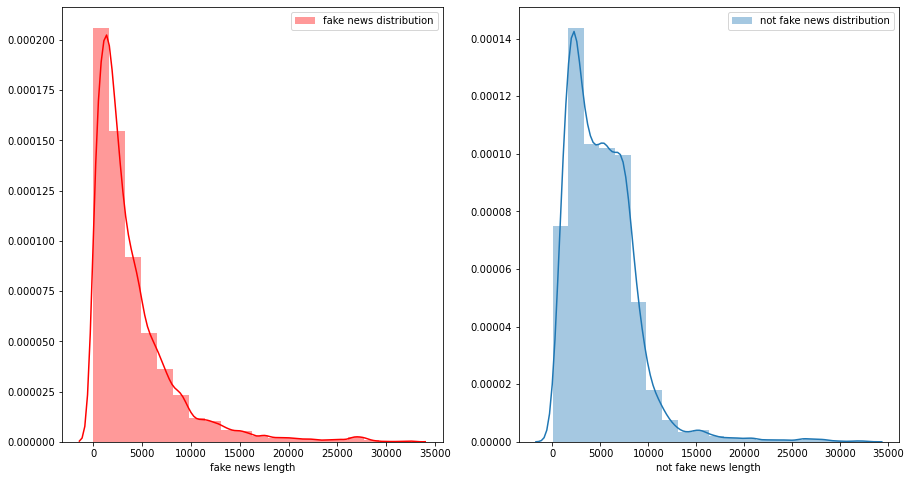

In [70]:
import seaborn as sns
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake news length')
ax[0].legend()

sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake news length')
ax[1].legend()

plt.show()

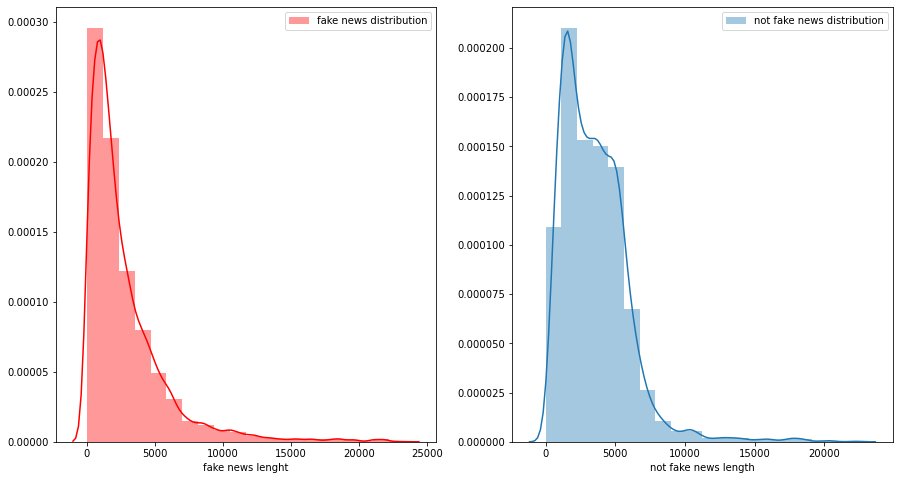

In [71]:
import seaborn as sns
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label='fake news distribution',color='r')

ax[0].set_xlabel('fake news lenght')
ax[0].legend()

sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label='not fake news distribution')
ax[1].set_xlabel('not fake news length')
ax[1].legend()

plt.show()

In [72]:
from textblob import TextBlob
df['polarity']=df['news'].apply(lambda x:TextBlob(x).sentiment.polarity)

# polarity with this i can print random 5 fake and true news by setting the ascending parameter as true for(not fake news) and false(fake news)

In [73]:
print("5 Random news with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:5].index]['news']):
  print('news {}:\n'.format(index+1),review)

5 Random news with Highest Polarity:
news 1:
 disgraced black lives matter activist shaun king published new new york daily news calling president trump s budget the cruel destructive inhumane budget ever released sitting president to save torture reading it i ve gone line line picked rhetoric outrageous claims king begins blaming everything white house chief strategist steve bannon possibly bigger boogeyman left president himself i m leninist lenin wanted destroy state that s goal too want bring everything crashing down destroy today s establishment words uttered white house chief strategist steve bannon someone tells believe them if someone tells are believe them i m sure shaun king like to given he s spent much professional career dodging uncomfortable questions true ethnicity continues claim father black despite fact never met never released results dna test public bannon ceo trump s campaign widely seen mix even image created sustained media virtually basis reality it s almost med

In [74]:
print("5 Random news with Highest Polarity:")
for index,news in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:5].index]['news']):
  print('news {}:\n'.format(index+1),news)

5 Random news with Highest Polarity:
news 1:
 google pinterest digg linkedin reddit stumbleupon print delicious pocket tumblr monday paul lepage maine s infamous racist governor issued statement basically threatened outofstate student attending college state investigation decide vote lepage s statement came eve election day many believe designed scare democratic leaning college students away polls governor complained democrats encouraging outofstate students commit voter fraud voting home state state attending college also said there way determine person cast ballot two states washington post democrats decades encouraged college students state vote maine even though way determine whether college students also voted home states lepage said statement casting ballots two different states voter fraud maine law requires anyone voting establish residency here welcome college students establishing residency great state long follow laws regulate voting motor vehicles taxes cannot tolerate vote

# building model& predictions

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(df['news'])

X = features
y = df['label']

In [76]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
naive = MultinomialNB()

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8348240906380441


In [121]:
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)


(15093, 162095)
(15093,)
(5031, 162095)
(5031,)


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      2649
           1       0.99      0.66      0.79      2382

    accuracy                           0.83      5031
   macro avg       0.88      0.83      0.83      5031
weighted avg       0.87      0.83      0.83      5031



In [78]:
cm = confusion_matrix(y_test,y_pred)

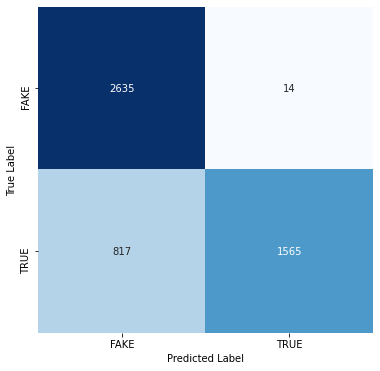

In [79]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [80]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [81]:
print(clf.score(X_train, Y_train))
print(clf.score(x_test, y_test))

0.882263300867952
0.8348240906380441


In [82]:
predictions = clf.predict(x_test)

In [83]:
cm = confusion_matrix(y_test, predictions)

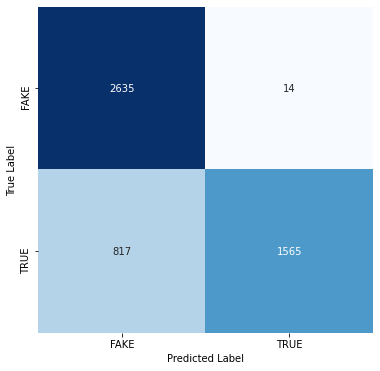

In [84]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [88]:
y_pred_prob=naive.predict_proba(x_test)[:,1]

In [89]:
y_pred_prob

array([0.280592  , 0.05068877, 0.03661835, ..., 0.06058181, 0.76294702,
       0.49159287])

In [91]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [92]:
auc_score=roc_auc_score(y_test,naive.predict(x_test))

In [93]:
auc_score

0.82586295099239

In [94]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [96]:
pred=lg.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,pred))

accuracy_score: 0.9487179487179487


In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2649
           1       0.94      0.95      0.95      2382

    accuracy                           0.95      5031
   macro avg       0.95      0.95      0.95      5031
weighted avg       0.95      0.95      0.95      5031



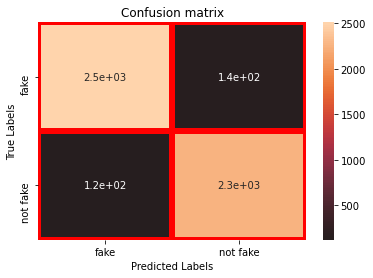

In [100]:
conf_mat = confusion_matrix(y_test,pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['fake','not fake'])
ax.yaxis.set_ticklabels(['fake','not fake'])
plt.show()

In [101]:
conf_mat

array([[2510,  139],
       [ 119, 2263]], dtype=int64)

In [102]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [103]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [104]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [105]:
auc_score

0.9487846751732748

In [106]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
dct.fit(X_train,Y_train)
preddct=dct.predict(x_test)
print(classification_report(y_test,preddct))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2649
           1       0.88      0.86      0.87      2382

    accuracy                           0.88      5031
   macro avg       0.88      0.88      0.88      5031
weighted avg       0.88      0.88      0.88      5031



In [107]:
conf_mat = confusion_matrix(y_test,preddct)
conf_mat

array([[2368,  281],
       [ 333, 2049]], dtype=int64)

In [108]:
y_pred_prob=dct.predict_proba(x_test)[:,1]

In [110]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [111]:
auc_score=roc_auc_score(y_test,dct.predict(x_test))
auc_score

0.8770618730702998

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_predict=rf.predict(x_test) 
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2649
           1       0.95      0.87      0.91      2382

    accuracy                           0.92      5031
   macro avg       0.92      0.92      0.92      5031
weighted avg       0.92      0.92      0.92      5031



In [113]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [116]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.9156142758115082

In [117]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=7)
ad.fit(X_train,Y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8660306102166567
[[2237  412]
 [ 262 2120]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2649
           1       0.84      0.89      0.86      2382

    accuracy                           0.87      5031
   macro avg       0.87      0.87      0.87      5031
weighted avg       0.87      0.87      0.87      5031



In [118]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(X_train,Y_train)
svc.score(x_test,y_test)

0.9600477042337507

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
predknn=knn.predict(x_test)
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.99      0.10      0.18      2649
           1       0.50      1.00      0.67      2382

    accuracy                           0.53      5031
   macro avg       0.75      0.55      0.43      5031
weighted avg       0.76      0.53      0.41      5031



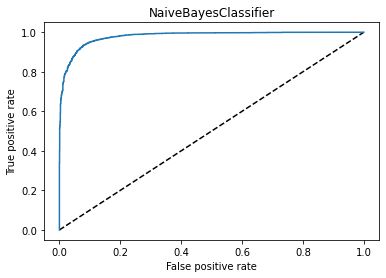

In [123]:
y_pred_prob=naive.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='NaiveBayesClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('NaiveBayesClassifier')
plt.show()

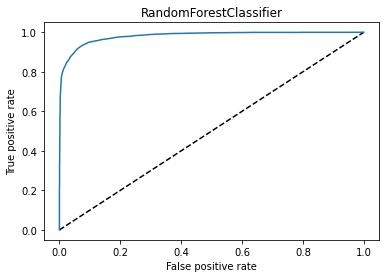

In [129]:
y_pred_prob=rf.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

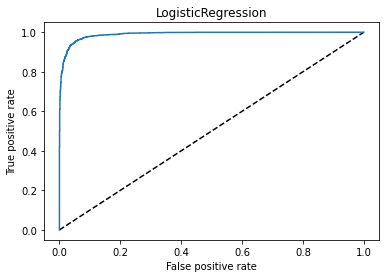

In [128]:
y_pred_prob=lg.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()

In [ ]:
#svm and logistic regression works best with a good accuracy score of 95 and even a good auc roc score